In [1]:
# pip install -q ultralytics
## The docs: https://docs.ultralytics.com/fr/modes/

In [2]:
from ultralytics import YOLO
import cv2 
import json
import matplotlib.pyplot as plt
import numpy as np
import colorsys

train = False

## Training a segmentation model with YOLO11 

In [3]:
# Load a pretrained YOLO model (recommended for training)
if train == True:
    model = YOLO("yolo11n-seg.pt")
    # Train the model on a custom dataset
    model.train(data="room_segmentation/data.yaml", epochs=200, imgsz=640, plots=True)

In [4]:
# Load the segmentation trained model
seg_model = YOLO("runs/segment/train/weights/best.pt")

## Run batched inference on a list of images

In [6]:
# Run batched inference on a list of images
base_path = f"test_images/samples/"
paths_list = [f"{base_path}/Output{i}_clean.png" for i in range(8)]
results = seg_model(paths_list)


0: 640x640 81 rooms, 79.8ms
1: 640x640 (no detections), 79.8ms
2: 640x640 30 rooms, 79.8ms
3: 640x640 2 rooms, 79.8ms
4: 640x640 21 rooms, 79.8ms
5: 640x640 9 rooms, 79.8ms
6: 640x640 89 rooms, 79.8ms
7: 640x640 1 room, 79.8ms
Speed: 4.9ms preprocess, 79.8ms inference, 28.3ms postprocess per image at shape (1, 3, 640, 640)


In [7]:
# Process results list
for i, result in enumerate(results):
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Probs object for classification outputs
    result.save(filename=f"test_images/results_samples/result{i}.png")

In [8]:
def get_unique_color(index, total_colors=100):
    """Generate a unique color for a given index using HSV color space.
    
    Args:
        index (int): The index for which to generate a color.
        total_colors (int): The total number of distinct colors.

    Returns:
        tuple: RGB color as a tuple of floats (r, g, b).
    """
    index = index % total_colors
    hue = index / total_colors
    rgb = colorsys.hsv_to_rgb(hue, 1.0, 1.0)
    return rgb

def plot_masks_countours(image_path, masks_xyn):

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image_height, image_width = image.shape[:2]

    plt.figure(figsize=(10, 10))
    plt.imshow(image)

    for i, mask in enumerate(masks_xyn):
        polygon = np.array([[x * image_width, y * image_height] for x, y in mask])
        plt.plot(polygon[:, 0], polygon[:, 1], linestyle='-', linewidth=2, color=get_unique_color(i))

    plt.axis("off")
    plt.show()

### Plots the results of the inference (only the masks countours)

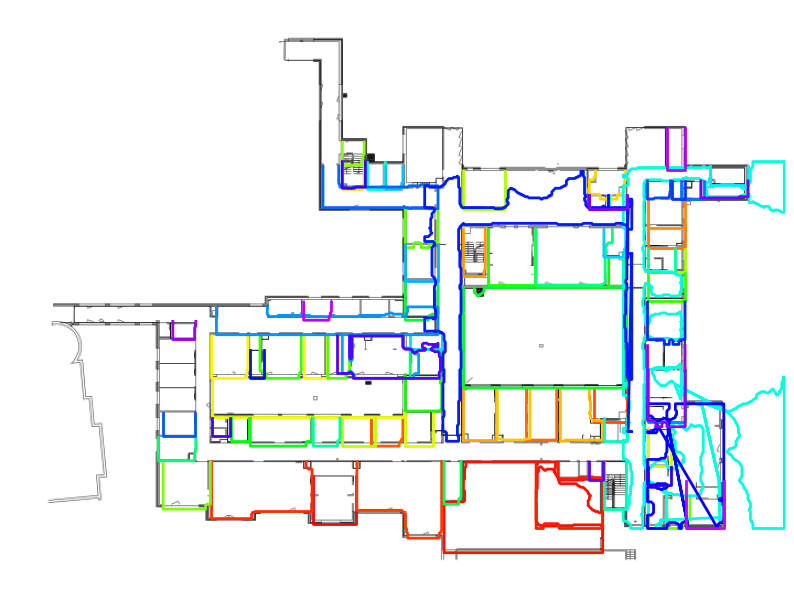

In [9]:
# Load image
inferance_image = plot_masks_countours('test_images/samples/Output0_clean.png', results[0].masks.xyn)

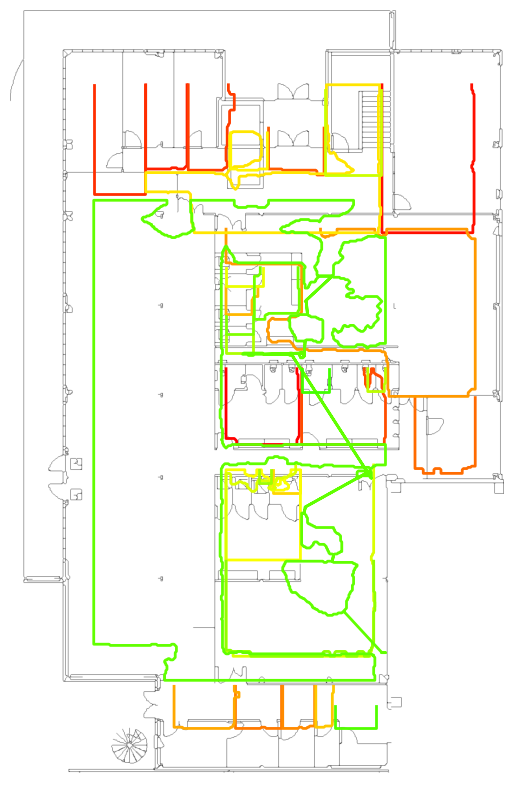

In [11]:
inferance_image = plot_masks_countours('test_images/samples/Output2_binary.png', results[2].masks.xyn)

## Save the results in a geojson format with the right coordinates

In [ ]:
def save_room_geojson(paths, results, threshold_conf=None):
    geojson = {
        "type": "FeatureCollection",
        "features": []
    }
    #####################################################
    print(f"GeoJSON saved")


In [ ]:
paths = ['output0.geojson']
save_room_geojson(paths, results)

GeoJSON saved


### Make a single inference

In [ ]:
# Run inference on one element 'outpout0.png' with arguments
seg_model.predict("output0.png", save=True, imgsz=320, conf=0.5)

FileNotFoundError: output0.png does not exist